## Analysis 2 of 4 for K4K Community Capstone

1) Describe trends of past donors <-- this notebook

2) **Describe subset of matches, exploiting attributes from PDF dataset**

3) Algorithm: score all companies in PDF based on similarity to matched ones

4) If time, annotate synthetic donate = 0  and try classification model

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df = pd.read_pickle('../Data/df_matches.pickle')

In [4]:
col_names = df.columns
new_cols = []
for c in col_names:
    c = c.upper()
    c = c.replace(' ', '_')
    new_cols.append(c)

df.columns = new_cols

In [5]:
df = df.rename(columns = {'DOLLAR_EQUIVALENT_AMOUNT': 'DOL_AMOUNT'})

In [110]:
df.head(10).T.to_clipboard()

''' 
Cols to analyze: 

COMPANY, 
DOL_AMOUNT,
ID,
ADDRESS,
AVIS,
CONTRIBUTION,
DOMAINE_DINTERET, # to do later
FILIALE_DE, 
ISFOUNDATION,
LIMITES_GEOG,
NOMBRE_DEMPLOYES,
PRINCIP_FILIALES #make a dummy of it
SECTEUR_INDUSTRIEL, 
ACTIF_FND,
CATEGORIE_FND
DOMAINES_DINTERET_FND,
ECHELLEDONS_FND,
PROJETS_PRIVILEGIES_FND,
TOTAL_ANNUEL_FND,

'''

' COMPANY, \nDOL_AMOUNT,\nID,\nADDRESS,\nAVIS,\nCONTRIBUTION,\nDOMAINE_DINTERET, # to do later\nFILIALE_DE, \nISFOUNDATION,\nLIMITES_GEOG,\nNOMBRE_DEMPLOYES,\nPRINCIP_FILIALES #make a dummy of it\nSECTEUR_INDUSTRIEL, \nACTIF_FND,\nCATEGORIE_FND\nDOMAINES_DINTERET_FND,\nECHELLEDONS_FND,\nPROJETS_PRIVILEGIES_FND,\nTOTAL_ANNUEL_FND,\n\n\n\n\n'

In [8]:
df['COUNT'] = 1
df['ISFOUNDATION'] = df.ID_FND.isna().astype(int)

In [10]:
def bar_line_plot(df, y1, y2, x, y1_axis = None, y2_axis = None,
 y1_label = None, y2_label= None, title = None, legend=True):

    import matplotlib.ticker as mtick

    fmt = '${x:,.0f}'
    tick = mtick.StrMethodFormatter(fmt)

    fig, ax = plt.subplots(1,1, figsize = (12,4))

    sns.barplot( ax = ax, data = df, y = y1, x=x, estimator = np.mean, ci = None, label = y1_label)

    ax2 = ax.twinx()
    sns.lineplot(ax = ax2, data = df,y = y2, x=x, estimator = np.sum, ci = None, label=y2_label)

    ax2.lines[0].set_linestyle("--")
    ax2.lines[0].set_color('red')

    ax.yaxis.set_major_formatter(tick)

    ax.set_ylim(bottom=0)
    ax2.set_ylim(bottom=0)


    if title != None:
        ax.set_title(title)
    if y1_axis != None:
        ax.set_ylabel(y1_axis)
    if y2_axis != None:
        ax2.set_ylabel(y2_axis)
    
    if legend:
        plt.legend(loc = 'lower center')
    plt.show()


In [28]:
df1 = df.groupby(['COMPANY','NOMBRE_DEMPLOYES','PRINCIP_FILIALES','LIMITES_GEOG',
 'CONTRIBUTION', 'FILIALE_DE', 'COUNT', 'ISFOUNDATION','SECTEUR_INDUSTRIEL'],\
     dropna=False, as_index=False)['DOL_AMOUNT'].mean()

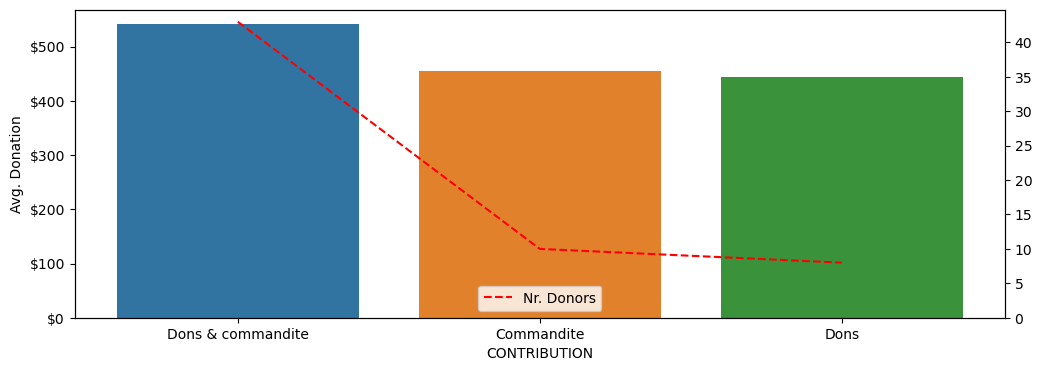

In [12]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='CONTRIBUTION', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

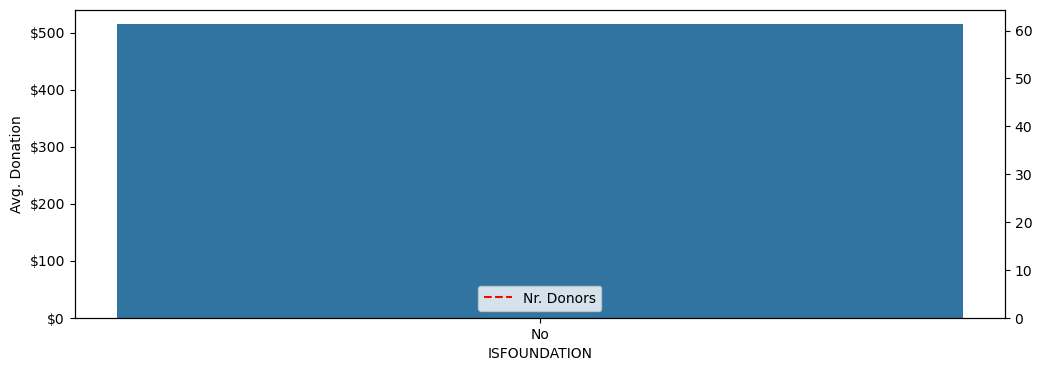

In [13]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='ISFOUNDATION', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

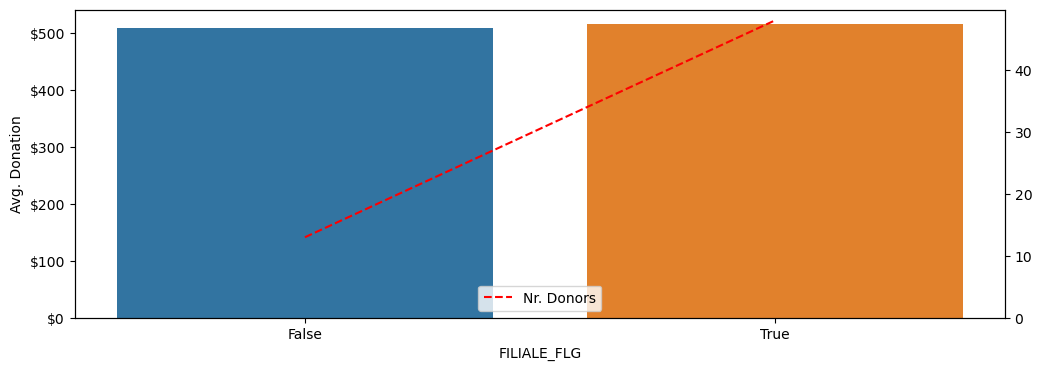

In [14]:
df1['FILIALE_FLG'] = df1.FILIALE_DE.isna()

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='FILIALE_FLG', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [15]:
df1.LIMITES_GEOG = df1.LIMITES_GEOG.str.strip('.').astype(str)

mapper = { 'locales, régionales et nationales' :'regional and national',
'locales' : 'locals',
'nationales' : 'nationals',
'régionales' :'regionals',
'nationales, régionales au Québec' : 'regional and national',
'régionales et nationales' : 'regional and national',
'locales, régionales':'local and regional',
'locales et régionales':'local and regional',
'locales, nationales et internationales':'international',
'nan':'nan',
'nationales et internationales':'international'}

df1.LIMITES_GEOG = df1.LIMITES_GEOG.map(mapper)

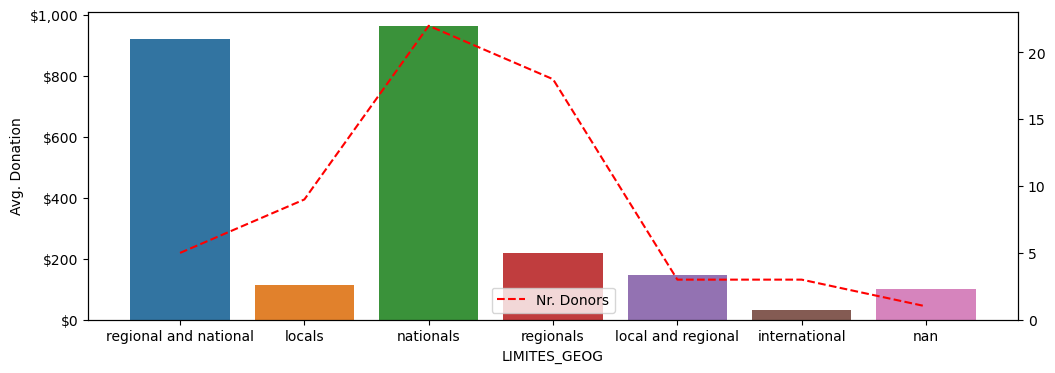

In [16]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='LIMITES_GEOG', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [17]:
df1.NOMBRE_DEMPLOYES = df1.NOMBRE_DEMPLOYES.str.replace(' ','').astype(float)
df1['NR_EMPLOYEE_BINS'], bins= pd.qcut(df1.NOMBRE_DEMPLOYES, q = 5, retbins=True)
df1 = df1.sort_values(['NR_EMPLOYEE_BINS'])
df1.NR_EMPLOYEE_BINS = df1.NR_EMPLOYEE_BINS.astype(str)


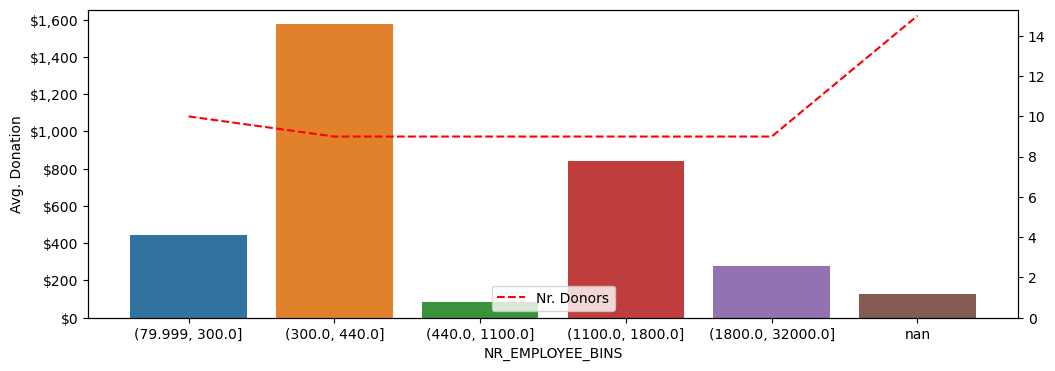

In [18]:
bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='NR_EMPLOYEE_BINS', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

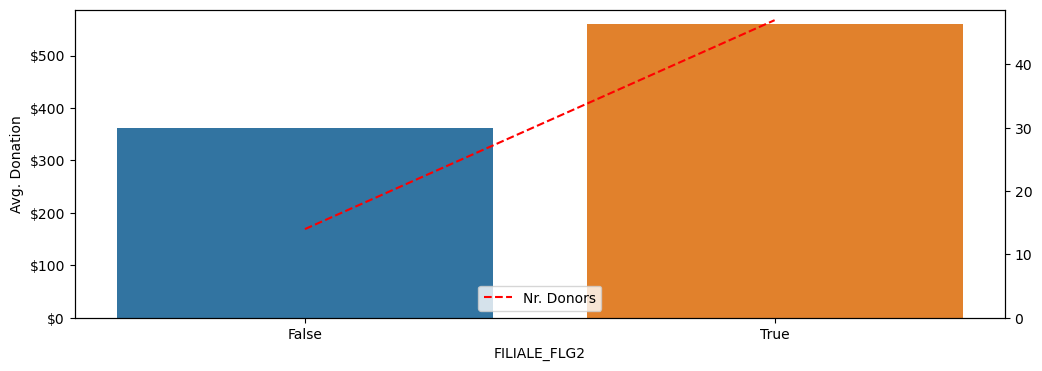

In [19]:
df1['FILIALE_FLG2'] = df1.PRINCIP_FILIALES.isna()

bar_line_plot(df1, y1='DOL_AMOUNT', y2='COUNT', x='FILIALE_FLG2', y1_axis =  'Avg. Donation',
y2_axis = '', y2_label= 'Nr. Donors', title = None, legend=True)

In [30]:
df1.SECTEUR_INDUSTRIEL.nunique()

55

In [32]:
df1.SECTEUR_INDUSTRIEL.value_counts()

Tapis, fabricant; Fabrication de moquettes, carpettes de bain, fil et distributeur de plancher de bois et laminé.                                                                                                                                                                        2
Alimentation : gestion de services alimentaires; Restauration rapide.                                                                                                                                                                                                                    2
Fournitures de bureau; Magasins de détail à grandes surfaces, des produits de papeterie, des livres, des produits informatiques, des équipements et mobiliers de bureau, des produits de création et d'impression numérique, du matériel d'art, des jeux éducatifs et des cadeaux.       2
Services financiers; Ensemble de services bancaires et financiers spécialisés au Mouvement Desjardins, aux gouvernements et aux moyennes et grandes ent

### Topic Modeling Industrial Sector

In [233]:
orgs = pd.read_excel('../Data/Organizations.xlsx')

df_sents = orgs[['SECTEUR INDUSTRIEL']].rename(columns = {'SECTEUR INDUSTRIEL': 'SECTEUR_INDUSTRIEL'})

In [234]:
# nltk.download('wordnet')
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

stopwords = stopwords.words('french') + stopwords.words('english') + ['/' ,'-', 'pour', 'ou', 'du', 'la', 'ou', 'de',
         'avec', 'par', 'depuis','a', 'd\'un', '']

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords] #french stopwords
    return " ".join(filtered_words)

In [235]:
df_sents.SECTEUR_INDUSTRIEL = df_sents.SECTEUR_INDUSTRIEL.apply(lambda s:preprocess(s))

In [236]:
sents_list = df_sents['SECTEUR_INDUSTRIEL'].tolist()

words = []
for sent in sents_list:
    words.extend(sent.split(' '))
df_words = pd.Series(words, name = 'words').to_frame()
sorted_words = df_words.words.value_counts().index.tolist()

In [237]:
df_sents['FLG'] = 0
cats = []
prev_nr_covered = 0
for w in sorted_words:
    df_sents['FLG'] += df_sents['SECTEUR_INDUSTRIEL'].apply(lambda x: w in x.split(' ')).astype(int)
    df_sents['FLG'] = df_sents['FLG'].apply(lambda x: min(1,x))
    nr_covered= df_sents['FLG'].sum()

    if nr_covered == prev_nr_covered:
        pass
    else:
        cats.append(w)

    if nr_covered == df_sents.shape[0]:
        break

    prev_nr_covered =   nr_covered





In [238]:
len(cats)

77

In [239]:
print(cats)

['services', 'produits', 'fabrication', 'financiers', 'fabricant', 'construction', 'transport', 'gestion', 'détail', 'alimentation', 'ingénierie', 'systèmes', 'vêtements', 'distribution', 'communications', 'commerce', 'bois', 'logiciels', 'etc', 'pièces', 'acier', 'entreprises', 'santé', 'conception', 'solutions', 'métal', 'distributeur', 'production', 'équipement', 'marketing', 'sécurité', 'assurances', 'vente', 'transformation', 'entretien', 'service', 'développement', 'exploitation', 'restauration', 'soins', 'offre', 'camions', 'plus', 'équipements', 'gamme', 'québec', 'centre', 'ameublement', 'bureau', 'canada', 'immobilier', 'secteurs', 'accessoires', 'manufacturier', 'fournisseur', 'assurance', 'affaires', 'réseau', 'environnement', 'technologies', 'administration', 'fabrique', 'commercialisation', 'agriculture', 'mondial', 'air', 'sport', 'ventilation', 'publiques', 'commerciale', 'divertissements', 'optique', 'système', 'imprimerie', 'enseignement', 'voyage', 'horticulture']


In [240]:
cats = ['fabrication',
'fabrique',
'fabricant', 
 'financiers',
 'manufacturier',
   'production', 
'construction', 'transport', 'gestion', 'alimentation'
'ingénierie', 'systèmes', 'vêtements', 'distribution', 'communications',
 'commerce', 'bois', 'logiciels', 'acier',
  'santé',  'métal', 'distributeur',
'équipement', 'marketing', 'sécurité', 'assurances',
    'transformation', 'entretien', 'restauration', 'soins',  'camions',
   'ameublement', 'industriel', 'médias', 'immobilier', 
    'assurance',  'réseau', 'technologies', 'administration',  
    'commercialisation', 'commercial', 'agriculture', 'sport', 'voyage']

In [241]:
df_sents['FLG'] = 0
prev_nr_covered = 0
for w in cats:
    df_sents['FLG'] += df_sents['SECTEUR_INDUSTRIEL'].apply(lambda x: w in x).astype(int)
    df_sents['FLG'] = df_sents['FLG'].apply(lambda x: min(1,x))
    nr_covered= df_sents['FLG'].sum()

    print(nr_covered*100/1342)

21.311475409836067
22.652757078986586
30.253353204172875
40.31296572280179
42.32488822652757
45.5290611028316
51.04321907600596
56.929955290611026
62.14605067064083
62.14605067064083
64.60506706408346
66.69150521609538
68.25633383010432
70.49180327868852
73.24888226527571
74.06855439642325
75.93144560357675
76.67660208643815
78.2414307004471
78.46497764530551
79.88077496274218
80.62593144560358
80.77496274217586
80.92399403874813
80.99850968703427
81.9672131147541
82.56333830104322
84.35171385991057
84.9478390461997
85.99105812220566
86.51266766020865
86.8107302533532
86.95976154992549
87.63040238450074
87.70491803278688
88.00298062593144
88.22652757078987
88.67362146050671
89.12071535022355
89.41877794336811
90.08941877794337
90.23845007451565
90.38748137108793


In [242]:
dict_cats = { 
    'fabrication' : ['fabrication', 'fabrique','fabricant', 'manufacturier', 'transformation','production','équipement'],
    'financiers' : [ 'financiers'],
    'commerce' : ['commercialisation', 'commercial', 'commerce','vêtements'],
    'construction' : ['construction', 'acier','ingénierie','métal','bois', 'industriel','entretien', 'ameublement', 'immobilier'],
    'transport':['transport', 'distribution', 'distributeur','camions','voyage'],
    'gestion': [ 'gestion','administration', 'marketing'] ,
    'systems': ['systèmes','logiciels', 'réseau',  'technologies', 'sécurité', 'communications', 'médias'],
    'alimentation': [ 'alimentation','agriculture',     'restauration'  ],
    'sante_assurance':[ 'santé', 'soins','assurances',     'assurance'  ],
    'sport':['sport']}

In [243]:
for key, value in dict_cats.items():
    df_sents[key] = df_sents['SECTEUR_INDUSTRIEL'].apply(lambda x: any(word in x.split(' ') for word in value) ).astype(int)

    

In [261]:
df_sents['other_sector'] = 1 - df_sents[list(dict_cats.keys())].max(axis=1) 

In [263]:
df_sents[ list(dict_cats.keys())+['other_sector'] ].describe().loc['mean',]*100

fabrication        39.493294
financiers         10.059613
commerce           11.028316
construction       23.621461
transport          18.628912
gestion            11.922504
systems            17.809240
alimentation       11.326379
sante_assurance     9.239940
sport               0.894188
other_sector        8.867362
Name: mean, dtype: float64

In [177]:
cats_sorted = df_cats.sort_values('rel_freq', ascending = False).category.tolist()

In [180]:
 df_cats.sort_values('rel_freq', ascending = False).tail(10)

,category,rel_freq
66,mondial,1.564829
60,technologies,1.341282
62,fabrique,1.341282
63,commercialisation,1.266766
65,agriculture,1.117735
69,divertissements,0.819672
70,optique,0.819672
72,imprimerie,0.670641
73,enseignement,0.447094
74,horticulture,0.298063


In [179]:
cats_sorted = [ 'fabrication', 'fabricant', 'financiers', 
'détail', 'construction', 'gestion', 'sport', 'alimentation', 'transport', 'industriel', 
'distribution', 'système', 'communications', 'ingénierie', 'commerce', 'systèmes', 'équipement', 
'etc', 'logiciels', 'assurance', 'vêtements', 'pièces', 'métal', 'bois', 'distributeur',
 'commercial', 'conception', 'entreprises', 'solutions', 'santé', 'acier', 'production',
  'vente', 'assurances', 'transformation', 'marketing', 'manufacturier',
   'développement', 'sécurité', 'restauration', 'entretien',
    'réseau', 'soins', 'ameublement', 'camions', 'médias', 'fournisseur','bureau', 'immobilier', 'accessoires', 'administration',
   'technologies', 'agriculture']

['service', 'produits', 'services', 'fabrication', 'air', 'fabricant', 'financiers', 'détail', 'construction', 'gestion', 'sport', 'gros', 'alimentation', 'transport', 'industriel', 'distribution', 'système', 'communications', 'ingénierie', 'commerce', 'systèmes', 'équipement', 'etc', 'logiciels', 'assurance', 'vêtements', 'pièces', 'métal', 'bois', 'distributeur', 'commercial', 'conception', 'entreprises', 'solutions', 'santé', 'acier', 'production', 'vente', 'assurances', 'centre', 'transformation', 'marketing', 'manufacturier', 'plus', 'développement', 'sécurité', 'restauration', 'offre', 'entretien', 'exploitation', 'gamme', 'québec', 'réseau', 'soins', 'ameublement', 'camions', 'médias', 'fournisseur', 'canada', 'secteurs', 'bureau', 'immobilier', 'accessoires', 'administration', 'affaires', 'mondial', 'technologies', 'fabrique', 'commercialisation', 'agriculture', 'divertissements', 'optique', 'imprimerie', 'enseignement', 'horticulture']


In [157]:
cats = ['services', 'produits', 'fabrication', 'financiers', 'fabricant', 'construction', 
'transport', 'gestion', 'détail', 'alimentation', 'gros', 'ingénierie', 'systèmes', 
'vêtements', 'distribution', 'communications', 'commerce', 'bois', 'logiciels', 
'etc', 'pièces', 'acier',
 'entreprises', 'santé', 'conception', 'solutions', 'métal', 'distributeur',
  'production', 'équipement', 'marketing', 'sécurité', 'assurances', 'vente', 
  'transformation', 'entretien', 'service', 'développement', 'exploitation',
   'restauration', 'soins', 'offre', 'camions', 'plus', 'gamme', 'québec', 'centre',
    'ameublement',  'bureau',  'canada', 'industriel', 'médias', 'immobilier', 'secteurs',
     'accessoires', 'manufacturier', 'fournisseur', 'assurance', 'affaires', 'réseau',
      'technologies', 'administration', 'fabrique', 'commercialisation', 'commercial',
       'agriculture', 'mondial', 'air', 'sport', 'divertissements', 'optique', 'système',
        'imprimerie', 'enseignement', 'horticulture']

3007

### Topic Modeling Interest Domains

In [266]:
orgs = pd.read_excel('../Data/Organizations.xlsx')

In [283]:
df_corpus = orgs[['DOMAINE DINTERET']].rename(columns = {'DOMAINE DINTERET':'corpus1'})

In [333]:
df_corpus.corpus1.sample(10)

c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


257     Privilégie la lutte contre le cancer (Défi Iris), commandite Hockey Canada, équipes can. de ski alpin, la Coupe Rogers, Équipe Vélo Iris et la pêche, l'éducation (optométrie), la coopération intern. Iris Mundial oeuvre bénévolement dans le tiers monde.
210                                                                                                                                                                           Éducation (les écoles doivent s'inscrire); environnement, esprit d'entreprise, sports.
1150                                                                                                                                                                                                                       Éducation en domaine maritime  seulement.
68                                                                                                                                                                                                                       

In [334]:
# nltk.download('wordnet')
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

stopwords = stopwords.words('french') + stopwords.words('english') + ['/' ,'-', 'pour', 'ou', 'du', 'la', 'ou', 'de','etc',
         'avec', 'par', 'depuis','a', 'd\'un', '']

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords] #french stopwords
    return " ".join(filtered_words)

c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [335]:
df_corpus['corpus2'] = df_corpus.corpus1.apply(lambda s:preprocess(s)) 


c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [336]:
from nltk import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')


fr = SnowballStemmer('french')

sentences = df_corpus['corpus2'].tolist()


c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\carlo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [359]:
new_sents = []
for s in sentences:
    new_sents.append(' '.join([fr.stem(word) for word in word_tokenize(s)]))


    


c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [382]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_features = 100


# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf = tf_vectorizer.fit_transform(new_sents)
tf_feature_names = tf_vectorizer.get_feature_names()

no_topics = 6

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=30, learning_method='online', random_state=0).fit(tf)

no_top_words = 20
display_topics(lda, tf_feature_names, no_top_words)

c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0:
général charit caus organ environ sugger cel accept aucun tourism peut principal musiqu occupent attent inuit mod privileg bénévol autr
Topic 1:
fondat canc enfant hôpital montréal societ malad canadien grand sein québec recherch centr coeur diabet jeuness canad justin centraid rêv
Topic 2:
sant éduc environ centraid enfant sécur seul être bien bours jeun jeuness social bienfais collect person local famill projet soutien
Topic 3:
organ local privileg éven emploi travaillent communaut environ vivent région certain domain enregistr soutien canad autr protect oeuvr équip différent
Topic 4:
communautair organ environ éduc sant cultur art sport développ servic social jeuness jeun recherch humanitair collect aid pauvret recyclag médical
Topic 5:
privileg enfant centraid vi amélior environ soleil oper qualit roug jeun seul communaut particip activ moisson agricultur programm croix fondat


In [383]:
pd.concat( [ df_corpus, pd.DataFrame(lda.transform(tf)) ] , axis=1).sample(5)

c:\Users\carlo\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,corpus1,corpus2,0,1,2,3,4,5
583,"Culture, développement régional, l'éducation, l'environnement et le développement durable, la santé, le sport, les partenaires socio-économiques humanitaires.",culture développement régional éducation environnement développement durable santé sport partenaires socio économiques humanitaires,0.011908,0.011910,0.011952,0.011940,0.940372,0.011918
990,"Général, santé et sécurité.",général santé sécurité,0.291673,0.041667,0.541469,0.041667,0.041858,0.041667
1060,"Privilégie : Fondation des maladies du c?ur du Canada, Fondation de la recherche sur le diabète juvénile et Jeunesse J'écoute.",privilégie fondation maladies canada fondation recherche diabète juvénile jeunesse écoute,0.015152,0.828980,0.015226,0.015289,0.015192,0.110162
295,Jeunes et santé.,jeunes santé,0.055556,0.055578,0.721191,0.055556,0.056189,0.055931
264,Environnement et organismes communautaire.,environnement organismes communautaire,0.041830,0.041673,0.041756,0.041788,0.791213,0.041740


In [ ]:
'''
DOMAINE_DINTERET
SECTEUR_INDUSTRIEL
FND_attributes
'''

55

In [248]:
df.SECTEUR_INDUSTRIEL.drop_duplicates()

0       Transport; Services ferroviaires pour passagers.
6      Pétrolières; Une des plus importantes sociétés...
10                     Alimentation; Brasseur de bières.
16     Transport; Le réseau WestJet offre un service ...
29     Vêtements et chaussures, détail et gros; Confe...
35                        Sport professionnel; Football.
38     Administration et gestion d'entreprises; Régim...
39         Services financiers; Assurances de personnes.
41     Construction et ingénierie; Un importants grou...
43     Commerce de gros et détail; Approvisionner les...
45     Alimentation : gestion de services alimentaire...
50     Alimentation; Mise en conserve de jus de fruit...
53     Hôtellerie et restauration; Centre de villégia...
69                    Divertissements; Salles de cinéma.
70     Produits d'acier et de métal; Spécialisé dans ...
73     Transport; services de transport de marchandis...
78     Transport; Transport ferroviaire des voyageurs...
90     Commerce de gros et déta

In [6]:
df.DOMAINE_DINTERET.describe()

count                                                   177
unique                                                   49
top       Adoptez un abri: un programme pour améliorer l...
freq                                                     16
Name: DOMAINE_DINTERET, dtype: object

In [7]:
# nltk.download('wordnet')
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

stopwords = stopwords.words('french') + stopwords.words('english') + ['/' ,'-', 'pour', 'ou', 'du', 'la', 'ou', 'de',
         'avec', 'par', 'depuis','a', 'd\'un', '']

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords] #french stopwords
    return " ".join(filtered_words)

In [8]:
# Extracting the raw corpus
corpus = df.DOMAINE_DINTERET.to_list()
corpus = [str(i).lower() for i in corpus]   
df_corpus = pd.DataFrame(corpus, columns = ['corpus1'])

In [15]:
domains = df.DOMAINE_DINTERET.tolist()

In [16]:
domains

["Appuie des organismes reconnus, des événements et des causes importantes, environnement. VIA est partenaire de Jeunesse, J'écoute.",
 "Appuie des organismes reconnus, des événements et des causes importantes, environnement. VIA est partenaire de Jeunesse, J'écoute.",
 "Appuie des organismes reconnus, des événements et des causes importantes, environnement. VIA est partenaire de Jeunesse, J'écoute.",
 "Appuie des organismes reconnus, des événements et des causes importantes, environnement. VIA est partenaire de Jeunesse, J'écoute.",
 "Appuie des organismes reconnus, des événements et des causes importantes, environnement. VIA est partenaire de Jeunesse, J'écoute.",
 "Appuie des organismes reconnus, des événements et des causes importantes, environnement. VIA est partenaire de Jeunesse, J'écoute.",
 'Centraide, collectivités, éducation, environnement, maladies infantiles, Fondation cancer du sein Qc, organismes de bienfaisance pour enfants, Patro de Lévis, recherche sur le cancer du se

In [9]:
corpus2 = pd.Series(corpus).map(lambda s:preprocess(s)) 

df_corpus['corpus2'] = corpus2

In [10]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')
# 1st: find best lang model

In [11]:
embeddings = [model.encode(i) for i in corpus2.tolist()]

KeyboardInterrupt: 

In [ ]:
len(embeddings)

177

In [1]:
df.DOMAINE_DINTERET

NameError: name 'df' is not defined

In [30]:
df['INTEREST_DOMAIN_CLUSTER'] = kmeans.labels_

In [32]:
df['INTEREST_DOMAIN_CLUSTER'].value_counts(1)

3    0.361582
2    0.259887
0    0.248588
1    0.129944
Name: INTEREST_DOMAIN_CLUSTER, dtype: float64

In [44]:
df[['INTEREST_DOMAIN_CLUSTER', 'DOMAINE_DINTERET']].drop_duplicates()\
    .groupby('INTEREST_DOMAIN_CLUSTER')['DOMAINE_DINTERET']\
    .apply(list).reset_index().to_clipboard(index=None)

In [39]:
df.loc[df.INTEREST_DOMAIN_CLUSTER == 0, 'DOMAINE_DINTERET'].drop_duplicates().values

array(['Centraide, collectivités, éducation, environnement, maladies infantiles, Fondation cancer du sein Qc, organismes de bienfaisance pour enfants, Patro de Lévis, recherche sur le cancer du sein et santé.',
       'Causes charitables en général, sports, éducation, environnement.',
       'Arts et culture, Centraide, éducation, environnement, santé, Hôpital Général Mtl, Croix-Rouge canadienne, dans les régions où nous  vivons, travaillons et exerçons nos activités.',
       'Santé et sport.',
       "Commandite Train des Fêtes, le centre  d'équestre Spruce Meadows.",
       "Alphabétisation et l'éducation supérieure, bourses d'études 2e  cycle chimie et génie chimique, environnement, Fonds boursier Gene-H.-Kruger, universités, cégeps et collèges dans les régions où vivent  et travaillent les employés.",
       'Cancer du sein, développement  économique, éducation, environnement, organisme MADD, Olympiques spéciaux et quelques autres.',
       'Arts et culture, développement économiq